# Preprocesado de datos

<img src="imagenes/proceso.png" style="width:60em; margin: 0 auto;"/>

Los datos recogidos del mundo real son imperfectos. Los sensores pueden estar descalibrados, las personas que introducen la información pueden equivocarse, las redes fallar al transmitir un dato, etc. También pueden producirse eventos estadísticamente improbables, que se salen de la norma y provocan desbalanceos en las estadísticas. Para impedir que dichos errores produzcan sesgos en el resultado del análisis de datos, hay que detectarlos y eliminarlos. Según el tipo de error, podremos usar diversos tipos de soluciones, como cambiar los valores erróneos por valores correctos o eliminar la entrada (es decir, la fila) por completo. Pandas ofrece algunas funciones para realizar estas operaciones, y las veremos en esta libreta.

---

# Índice
[Datos omitidos](#Datos-omitidos) <br/>
[Rellenado de datos omitidos](#Rellenado-de-datos-omitidos) <br/>
&nbsp;&nbsp;&nbsp;&nbsp; [Eliminar filas y columnas](#Eliminar-filas-y-columnas) <br/>
&nbsp;&nbsp;&nbsp;&nbsp; [Relleno con valores por defecto](#Relleno-con-valores-por-defecto) <br/>
&nbsp;&nbsp;&nbsp;&nbsp; [Rellenado con arrastre de valores](#Rellenado-con-arrastre-de-valores) <br/>
&nbsp;&nbsp;&nbsp;&nbsp; [Imputación de valores](#Imputación-de-valores) <br/>
[Valores erróneos y outliers](#Valores-erróneos-y-outliers) <br/>
[Conclusiones](#Conclusiones) <br/>

---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random                    # Nuevo: Funciones aleatorias de la librería estándar

## Datos omitidos

En algunos casos, cuando se realiza una campaña de recogida de datos, algunos datos no se llegan a recoger o almacenar en absoluto. Hay tres tipos de datos omitidos:
- Filas omitidas: una fila entera no es recogida. Puede pasar, por ejemplo, si tenemos un sistema que regularmente recoge una serie de variables y las guarda con una marca temporal, y dicho sistema falla en un intervalo temporal completo (por fallos en la red, por falta de alimentación eléctrica, etc.).<br/>
<img src="imagenes/fila_omitida.png"  style="width:30em; margin: 0 auto;"/>
- Columnas omitidas: una variable concreta no se recoge en ninguna de las entradas. Puede producirse por fallos de un determinado sensor, por fallos de diseño de la base de datos, porque una variable haya quedado anticuada y ya no se recoja, etc.<br/>
<img src="imagenes/columna_omitida.png"  style="width:30em; margin: 0 auto;"/>
- Celdas omitidas: son valores concretos en una fila/columna concreta omitidos. Puede deberse, por ejemplo, al fallo de un único sensor en un único intervalo de tiempo. Dan lugar a filas y columnas incompletas. Dichos fallos pueden encadenarse, produciéndose varias filas con una misma columna omitida.<br/>
<img src="imagenes/celdas_omitidas.png"  style="width:30em; margin: 0 auto;"/>

Al haber datos omitidos, puede producirse que algunos algoritmos de minería de datos fallen por completo, o produzcan resultados erróneos, por lo que a menudo es necesario rellenarlos con un valor numérico o bien eliminarlos por completo del conjunto de datos.

En Pandas, los datos omitidos se pueden detectar con la función <code>isna</code>. Veamos un ejemplo de una fila omitida:

In [19]:
parking1 = pd.read_csv("datos/parking1.csv", index_col=0, parse_dates=True)
parking1

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Se puede observar que la fila de las 15:15 no tiene datos. Vamos la salida de <code>isna</code>:

In [20]:
parking1.isna()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,False,False,False,False,False,False
2021-09-11 14:15:00,False,False,False,False,False,False
2021-09-11 14:30:00,False,False,False,False,False,False
2021-09-11 14:45:00,False,False,False,False,False,False
2021-09-11 15:00:00,False,False,False,False,False,False
2021-09-11 15:15:00,True,True,True,True,True,True
2021-09-11 15:30:00,False,False,False,False,False,False
2021-09-11 15:45:00,False,False,False,False,False,False
2021-09-11 16:00:00,False,False,False,False,False,False
2021-09-11 16:15:00,False,False,False,False,False,False


Esta función automáticamente marca con <code>True</code> cualquier celda con valores nulos (<code>NaN</code>). Más adelante en la libreta, veremos las estrategias para mitigar esta falta de datos.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 1</b><br/>
    <p>Abra los ficheros <code>parking2.csv</code> y <code>parking3.csv</code> y visualice los datos omitidos.</p>
</div>

Si abrimos el fichero <code>parking1.csv</code> veremos que la fila marcada tiene entrada en el índice, pero no tiene datos. No obstante, cuando falta una fila, a menudo no tiene entrada en el índice. Esto provocará que Pandas no sepa de su existencia y por tanto no detecte ninguna fila omitida:

In [21]:
parking1b = pd.read_csv("datos/parking1B.csv", index_col=0, parse_dates=True)
parking1b.isna()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,False,False,False,False,False,False
2021-09-11 14:15:00,False,False,False,False,False,False
2021-09-11 14:30:00,False,False,False,False,False,False
2021-09-11 14:45:00,False,False,False,False,False,False
2021-09-11 15:00:00,False,False,False,False,False,False
2021-09-11 15:30:00,False,False,False,False,False,False
2021-09-11 15:45:00,False,False,False,False,False,False
2021-09-11 16:00:00,False,False,False,False,False,False
2021-09-11 16:15:00,False,False,False,False,False,False


En esta tabla, se puede ver que hay un salto entre las 15:00 y las 15:30. En estos casos, tendremos que aplicar el sentido común para corregir los datos; es decir, tendremos que aplicar algo que sabemos acerca de la fuente de datos (en este caso, que los datos se recogen cada 15 minutos) para poder detectar y corregir este tipo de fallos. Pandas hace mucho, pero no puede sustituir el conocimiento humano por completo. ¿Cómo actuamos en este caso? Habrá que corregir el índice. Para ello, Pandas ofrece la función <code>reindex</code>, a la que pasaremos un índice generado en parte por los datos (inicio y final), y en parte por nuestro conocimiento (intervalo de 15 minutos). Pandas sabrá qué datos colocar en cada índice, y dónde rellenar con <code>NaN</code>:

In [22]:
inicio = parking1b.index[0]
final = parking1b.index[-1]
nuevo_indice = pd.date_range(start=inicio, end=final, freq="15min")

In [23]:
nuevo_indice

DatetimeIndex(['2021-09-11 14:00:00', '2021-09-11 14:15:00',
               '2021-09-11 14:30:00', '2021-09-11 14:45:00',
               '2021-09-11 15:00:00', '2021-09-11 15:15:00',
               '2021-09-11 15:30:00', '2021-09-11 15:45:00',
               '2021-09-11 16:00:00', '2021-09-11 16:15:00'],
              dtype='datetime64[ns]', freq='15T')

In [24]:
parking1b.reindex(nuevo_indice)

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


En este código hemos extraído la primera y última de las entradas del índice, y hemos generado uno nuevo con la frecuencia de 15 minutos. A continuación, con reindex, hemos asignado el índice. No obstante, esta última línea no guarda los cambios en <code>parking1b</code>. Para ello, tendremos que asignar la salida de nuevo a <code>parking1b</code>:

In [26]:
parking1b = parking1b.reindex(nuevo_indice)
parking1b

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Si queremos tener una copia de los datos originales en memoria, podemos asignar el valor a una nueva variable.

Para ver qué datos faltan en una columna o fila concreta, podemos combinar la operación <code>loc</code> o <code>iloc</code> con <code>isna</code>:

In [27]:
parking1b.loc[:,"Sensor 2"].isna()

2021-09-11 14:00:00    False
2021-09-11 14:15:00    False
2021-09-11 14:30:00    False
2021-09-11 14:45:00    False
2021-09-11 15:00:00    False
2021-09-11 15:15:00     True
2021-09-11 15:30:00    False
2021-09-11 15:45:00    False
2021-09-11 16:00:00    False
2021-09-11 16:15:00    False
Freq: 15T, Name: Sensor 2, dtype: bool

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 2</b><br/>
    <p>Abra el fichero <code>parking4.csv</code> e inspeccione qué valores omitidos hay. Guarde los contenidos en la variable <code>parking4</code> para usarlos en el siguiente ejercicio.</p>
</div>

Para entender mejor la dimensión de los datos omitidos, podemos usar la función <code>sum</code> sobre el resultado de <code>isna</code> (que también es un <code>DataFrame</code>):

In [28]:
parking1b.isna().sum()

Sensor 1    1
Sensor 2    1
Sensor 3    1
Sensor 4    1
Sensor 5    1
Sensor 6    1
dtype: int64

En exploración de datos, es uno de los datos que querremos conocer cuando abrimos un fichero.

## Rellenado de datos omitidos

Ya hemos visto cómo detectar los datos omitidos, incluso cuando están "ocultos". Ahora tenemos que ver qué hacemos cuando faltan datos. Hay tres estrategias principales:
- Eliminar la fila/columna que contiene datos omitidos: es la estrategia más sencilla. Si no nos interesa la variable, eliminamos la columna por completo. Si nos interesa, pero nos da igual tener una muestra menos más adelante, eliminamos la fila. La decisión de eliminar una columna dependerá a menudo del porcentaje de datos omitidos. Si son muchos, se elimina, y si son pocos, se usa alguna de las otras estrategias.
- Rellenar con un valor por defecto: consiste en cambiar el <code>NaN</code> con un valor neutro, es decir, que no cause sesgos. Para elegir el valor, tendremos que usar "conocimiento del campo" (término que significa usar el sentido común para encontrar algo que valga para el problema).
- Arrastrar valores: en estructuras de datos que tienen una continuidad fila a fila (o columna a columna), como las series temporales, podemos usar el valor anterior o posterior para rellenar.
- Rellenar con un valor imputado: consiste en usar una fórmula que, en función al resto de variables de la columna y/o fila, calcula un valor de relleno. Un ejemplo es la interpolación lineal entre los valores anterior y posterior (el promedio, si sólo rellenamos un valor). En algunos casos, incluso podemos usar variables externas al conjunto de datos.

Veremos un ejemplo de cada una de estas estrategias.

### Eliminar filas y columnas

In [29]:
parking3 = pd.read_csv("datos/parking3.csv", index_col=0, parse_dates=True)
parking3

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,NaN,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,NaN,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,NaN,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,NaN,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Veamos las estadísticas de datos omitidos por columna:

In [30]:
parking3.isna().sum()

Sensor 1    0
Sensor 2    2
Sensor 3    1
Sensor 4    1
Sensor 5    1
Sensor 6    0
dtype: int64

Para eliminar filas y columnas, Pandas ofrece la función <code>dropna</code>. Los parámetros determinan, entre otras cosas, en qué eje se realiza la eliminación (filas o columnas), y el porcentaje de faltas válido. Empecemos viendo cómo eliminamos las filas en las que falte al menos un dato:

In [31]:
parking3

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,NaN,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,NaN,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,NaN,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,NaN,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


In [36]:
parking3.loc[parking3['Sensor 2']=='LIBRE'; :]

SyntaxError: invalid syntax (748027106.py, line 1)

Ésta es la acción que hace <code>dropna</code> por defecto. Muchos algoritmos de minería de datos no admiten ningún dato omitido, por lo que esta estrategia suele ser válida. Supongamos que en lugar de eliminar filas con cualquier dato omitido, queremos que sólo se eliminen aquellas en las que falta el dato del <code>Sensor 2</code> porque es crítico y los otros no:

In [37]:
parking3.dropna(subset = ["Sensor 2"])

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,NaN,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,NaN,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Podemos pasar más columnas críticas en la lista. <code>dropna</code> también admite parámetros para eliminar filas en las que falten todas las entradas (parámetro <code>how="all"</code>).

Otra operación es la eliminación de columnas. Para ello, sólo tenemos que pasar el parámetro <code>axis</code>:

In [38]:
parking3.dropna(axis="columns")

,Sensor 1,Sensor 6
2021-09-11 14:00:00,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO
2021-09-11 15:00:00,OCUPADO,LIBRE
2021-09-11 15:15:00,LIBRE,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO


Esto nos deja con muy pocas columnas. Dentro de este mismo conjunto de datos, tenemos columnas en las que hay sólo un dato omitido (supongamos que podemos compensarlo más adelante) y columnas con más de uno (que no podemos recuperar). Pandas nos permite eliminar sólo las columnas más "afectadas". Para ello, podemos pasar el parámetro <code>thresh</code>. Éste parametro dice cuántos valores no nulos tenemos que tener para conservar una columna. En este caso, tenemos 10 filas, por lo que cada columna debe tener al menos 9 valores no nulos para que la conservemos:

In [39]:
parking3.dropna(axis="columns", thresh=9)

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,NaN,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,NaN,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Esto nos deja un conjunto de datos más rico, que puede ser recuperado con arrastre o imputación de valores. Como en el caso anterior, podemos también configurar <code>dropna</code> para que elimine las columnas en las que falten todos los datos.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 3</b><br/>
    <p>Elimine todas las filas con datos omitidos de la variable <code>parking4</code>. Explique por qué obtiene este resultado y plantee una estrategia más útil.</p>
</div>

### Relleno con valores por defecto

In [40]:
parking3b = parking3.dropna(axis="columns", thresh=9)

Pasamos ahora a ver las estrategias de relleno. La primera y más simple es el rellenado con valores por defecto. Dicho valor tiene que ser un valor neutro para el problema en cuestión. A menudo, ese valor es 0, cuando hablamos de valores numéricos. Pero el 0 no siempre será válido; por ejemplo, si una columna representa factores de ajuste que se multiplican más adelante (por ejemplo, la amplificación o atenuación de una señal) el valor neutro puede ser 1. O si hablamos de probabilidades de un experimento binomial, el valor neutro sería 0.5. En el caso de nuestra tabla de parkings, tendremos que elegir entre OCUPADO y LIBRE. Supongamos que el valor por defecto es que una plaza está ocupada, porque no queremos dar falsas esperanzas a los usuarios.

Pandas permite rellenar los datos omitidos con <code>fillna</code>:

In [41]:
parking3b.fillna("OCUPADO")

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Supongamos que queremos rellenar distintos valores en distintas columnas, en ese caso, tendremos que pasarle un diccionario a <code>fillna</code>:

In [42]:
rellenos = {"Sensor 3": "LIBRE", "Sensor 4": "OCUPADO"}
parking3b.fillna(rellenos)

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,LIBRE,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Nótese que <code>Sensor 5</code> sigue teniendo un valor omitido, dado que no lo hemos puesto en la lista de rellenos. Esto nos permite hacer excepciones a una regla.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 4</b><br/>
    <p>Repita la operación de relleno de datos por columna con valores por defecto, incluyendo en esta ocasión la columna <code>Sensor 5</code>. Rellénela con el valor <code>"OCUPADO"</code>.</p>
</div>

In [46]:
rellenos = {"Sensor 3": "LIBRE", "Sensor 4": "OCUPADO","Sensor 5":"OCUPADO"}
parking3b.fillna(rellenos)

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,LIBRE,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


### Rellenado con arrastre de valores

En el caso del parking, es más probable que si un sitio estaba ocupado antes, lo siga estando en el siguiente intervalo (o, al menos, eso es lo que podríamos pensar a menos que tengamos más información acerca del tráfico). Por tanto, una estrategia válida sería arrastrar el valor anterior de una columna a la fila omitida. Para ello, <code>fillna</code> ofrece el parámetro <code>method</code>:

In [49]:
parking3b.fillna(method="ffill")

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Alternativamente, podríamos usar no el valor anterior, sino el siguiente, cambiando <code>"ffill"</code> por <code>"bfill"</code>:

In [51]:
parking3b.fillna(method="bfill")

,Sensor 1,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Como vemos, el método <code>fillna</code> es muy potente. No obstante, podemos usar estrategias más avanzadas para el relleno, como veremos en la siguiente sección.

### Imputación de valores

Veremos dos estrategias de imputación de valores. En primer lugar, vamos a ver la interpolación, que se puede usar sobre datos numéricos. En segundo lugar, veremos una estrategia específica para el caso del aparcamiento, que ilustrará la forma general de rellenar datos con estrategias personalizadas.

Para el ejemplo de la interpolación usaremos los datos de velocidad recogidos de un coche en marcha. Dichos datos tendrán algunos huecos. Leemos y representamos los datos gráficamente en primer lugar:

In [7]:
medidas_coche = pd.read_csv("datos/medidas_coche.csv", index_col=0, parse_dates=True)
medidas_coche

,speed
Time,
2021-09-12 20:02:03,0.0
2021-09-12 20:02:08,11.0
2021-09-12 20:02:13,13.0
2021-09-12 20:02:18,8.0
2021-09-12 20:02:23,10.0
2021-09-12 20:02:28,22.0
2021-09-12 20:02:33,25.0
2021-09-12 20:02:38,NaN
2021-09-12 20:02:43,28.0


Veamos los valores omitidos:

In [53]:
medidas_coche.isna().sum()


speed    4
dtype: int64

In [6]:
medidas_coche.sum()

speed    1363.0
dtype: float64

En este caso, el conjunto de datos que hemos leído es ligeramente más voluminoso que los anteriores, por lo que usamos la función <code>head</code>, que sólo muestra las primeras 5 líneas del dataset, aunque podemos configurarlo para que muestre más. Siempre que abramos un dataset, a la hora de hacer analítica de datos exploratoria, deberíamos llamar a <code>head</code> para entender mejor la naturaleza de los datos.

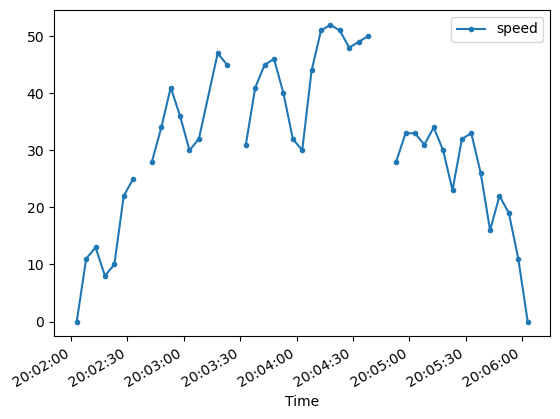

In [8]:
medidas_coche.plot(marker='.')
plt.show()

Dibujar los datos con marcadores ayuda a menudo a entender mejor algunos aspectos como su densidad. En este caso, al ser un poco más voluminoso el conjunto de datos (y numérico), la representación gráfica es más cómoda que representar la tabla. Podemos ver que hay tres huecos cerca de <code>20:02:30</code>, <code>20:03:30</code> y <code>20:04:30</code>, respectivamente, siendo el tercero más largo que los dos primeros.

Para imputar los datos que faltan utilizaremos la interpolación, que consiste en considerar que la magnitud medida varía de forma lineal entre un punto y otro. Para los huecos en los que sólo falta un dato, esto equivale al promedio del valor anterior y el posterior, y en el caso de huecos más grandes, implica estimar la fórmula de la línea que cruza los puntos anterior y posterior y obtener los valores intermedios. Todo esto, con Pandas se reduce a:

In [57]:
medidas_coche_limpio = medidas_coche.interpolate()

En este caso, hemos guardado el conjunto de datos por separado para poder representar ambos juntos y ver el efecto de <code>interpolate</code>:

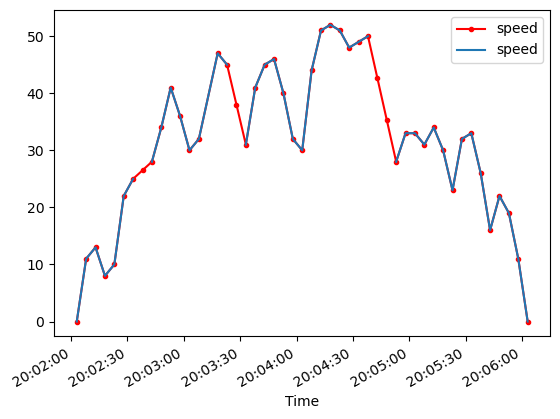

In [74]:
eje = medidas_coche_limpio.plot(marker='.', color='red')
medidas_coche.plot(ax = eje)
plt.show()

Nótese que para representar ambas líneas en una misma gráfica, hemos guardado el objeto eje que devuelve <code>plot</code> en la primera llamada y se la hemos pasado a la segunda como el parámetro <code>ax</code>, para que no inicie una nueva gráfica.

¿Son estos valores imputados correctos? No necesariamente, pero son un mal menor que necesitamos para poder tener unos datos limpios. La idoneidad de utilizar interpolación lineal u otro tipo de técnica, depende mucho del conocimiento del campo que tengamos. Si no sabemos nada, es una técnica por defecto razonable.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 5</b><br/>
    <p>Rellene los datos de velocidad del coche arrastrando el valor anterior y compare gráficamente el resultado con la interpolación</p>
</div>

Volvamos al ejemplo del parking, donde la interpolación no es posible, y por tanto tendremos que usar alguna técnica alternativa. Vamos a ver dos soluciones para ilustrar la gran flexibilidad que nos ofrecen las funciones de Pandas.

En la primera, iteraremos sobre las columnas, y mediante la función <code>apply</code> sustituiremos los datos omitidos por un valor aleatorio entre <code>LIBRE</code> y <code>OCUPADO</code>. En primer lugar, definimos la función que le vamos a pasar a <code>apply</code>:

In [75]:
def imputar_valor(valor_celda):
    if pd.isna(valor_celda):
        return random.choice(["LIBRE","OCUPADO"])
    else:
        return valor_celda

Esta función podría ser mucho más compleja, tomando parámetros obtenidos del propio dataset, o de fuentes externas. En este caso, se limita a reproducir el valor que toma a su entrada si es distinta a <code>NaN</code> y dar un valor aleatorio en caso contrario. Es muy importante tener en cuenta que la definición de <code>NaN</code> de Pandas es más extensa que la de Python básico o Numpy. Por tanto, hay que usar la función <code>pd.isna()</code> en lugar de funciones de otras librerías. A continuación hacemos la operación de iterar columna a columna y hacer <code>apply</code>:

In [76]:
parking3c = parking3.copy()

for columna, valores in parking3c.iteritems():
    parking3c.loc[:,columna] = valores.apply(imputar_valor)

Como repaso de la operación de iteración de columnas, hay que recordar que en cada iteración, la variable <code>columna</code> toma el nombre de la columna, y <code>valores</code> una copia de los valores de la columna. Podemos usar los valores de <code>valores</code> para leerlos, pero cualquier cambio que hagamos en ellos no se reflejarán en el <code>DataFrame</code> original. De ahí que asignemos la salida de <code>valores.apply(imputar_valor)</code> a <code>parking3.loc[:,columna]</code>. También es muy importante tener en cuenta que, a diferencia de las operaciones que hemos visto antes para rellenar los datos omitidos, ésta operación sí modifica el dataset original. Por tanto, si queremos mantenerlo, tendremos que hacer antes una copia con la función <code>.copy()</code>. Veamos el resultado:

In [79]:
parking3c

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


La otra solución al problema que veremos tendrá en cuenta el factor tiempo. Supongamos que sabemos que la hora punta del parking es entre las 15:00 y las 16:00; en esos instantes, consideraremos que un valor omitido será, seguramente, <code>OCUPADO</code>, mientras que fuera de ese intervalo, habrá más probabilidad de que sea <code>LIBRE</code>. Aquí, de nuevo, las funciones de Pandas nos permiten una gran flexibilidad. Una aproximación sería hacer una selección del <code>DataFrame</code> en horas punta y rellenar:

In [80]:
parking3d = parking3.copy()

parking3d.loc["2021-09-11 15:00:00":"2021-09-11 16:00:00",:] = parking3d.loc["2021-09-11 15:00:00":"2021-09-11 16:00:00",:].fillna("OCUPADO")

In [81]:
parking3d

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,NaN,NaN,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Como vemos, se han rellenado los datos omitidos de las horas punta con <code>OCUPADO</code>, mientras el resto queda libre. Dado que queremos rellenar los valores restantes con <code>LIBRE</code>, la operación restante es un simple relleno con constante:

In [82]:
parking3d = parking3d.fillna("LIBRE")
parking3d

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6
2021-09-11 14:00:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 14:15:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,LIBRE
2021-09-11 14:30:00,LIBRE,OCUPADO,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 14:45:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,OCUPADO
2021-09-11 15:00:00,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE,LIBRE
2021-09-11 15:15:00,LIBRE,OCUPADO,OCUPADO,OCUPADO,OCUPADO,LIBRE
2021-09-11 15:30:00,LIBRE,LIBRE,OCUPADO,LIBRE,OCUPADO,LIBRE
2021-09-11 15:45:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:00:00,LIBRE,OCUPADO,OCUPADO,LIBRE,LIBRE,OCUPADO
2021-09-11 16:15:00,LIBRE,LIBRE,OCUPADO,LIBRE,LIBRE,OCUPADO


Podríamos aplicar muchas otras estrategias, como por ejemplo, calcular primero el valor más común de cada columna o fila y rellenarlo con él, iterar fila a fila y rellenar según el valor más común de las últimas N filas, etc.

## Valores erróneos y outliers

Junto con el problema de los datos omitidos, los datos erróneos y los <i>outliers</i> constituyen las principales funetes de <i>suciedad</i> en los datos. Los datos erróneos son aquellos que no pueden darse por la naturaleza del problema; por ejemplo, un número fraccional en una celda que recoge el aforo de un local, o un valor no numérico. Según el tipo de error, será más o menos fácil corregirlo y sus consecuencias serán más o menos destructivas para los datos. Los outliers, por otro lado, son valores que técnicamente son posibles, pero son muy improbables, por ejemplo, una lectura de 284 km/h en un radar de tráfico. Estos valores pueden causar sesgos en los datos, y se suelen eliminar.

Veamos primero un ejemplo de dato erróneo. Supongamos una tabla que recoge el número de asistentes a un conjunto de salas, junto a su aforo máximo. Todos los datos deberían ser numéricos, pero alguien ha rellenado una de las entradas con texto:

In [ ]:
asistencia = pd.read_csv("datos/asistencia.csv", index_col=0)

In [ ]:
asistencia

Veamos qué tipos de dato ha inferido Pandas para cada columna:

In [ ]:
asistencia.dtypes

Todas las columnas son numéricas excepto <code>Mañana</code>. Esto significa, por ejemplo, que si bien podemos calcular la tasa de ocupación de la tarde o noche con facilidad:

In [ ]:
asistencia.loc[:,"Tarde"] / asistencia.loc[:,"Aforo"]

No podremos hacer lo propio con la mañana, ya que daría un error. No se incluye esta operación por motivos de estética, pero si sustituimos <code>"Tarde"</code> por <code>"Mañana"</code> en el código anterior, veremos esto.

Para corregir el problema, tendremos que sustituir el valor por uno correcto, corrigiendo a la vez el tipo de dato de los demás valores de la columna, que no han sido procesados correctamente. Para ello, volveremos a recurrir a <code>.apply()</code> con una función que evalúa si el valor es válido o no:

In [ ]:
def valor_valido(valor):
    if valor.isnumeric():
        return int(valor)
    else:
        return 0

Esta función está muy focalizada al tipo de error que buscamos. En primer lugar, asume que <code>valor</code> es una cadena de texto. De no serlo, la función provocará un error. En segundo lugar, asume que el valor numérico es un <code>int</code>. Normalmente, tendremos que actuar de este modo, es decir, comprender primero los datos que tenemos, luego los errores, y diseñar una función que permita corregirlos adecuadamente. Nuevamente, usando el conocimiento de campo.

In [ ]:
asistencia.loc[:,"Mañana"] = asistencia.loc[:,"Mañana"].apply(valor_valido)

In [ ]:
asistencia

In [ ]:
asistencia.dtypes

En este caso, el error es muy dañino. Si fuese un error numérico (por ejemplo, -1), sólo tendríamos que limitarnos a corregir el valor.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 6</b><br/>
    <p>Abra el fichero <code>asistencia2.csv</code> e inspeccione los errores que aparecen. A continuación corrija dichos valores, sustituyéndolos por un valor razonable para el problema.</p>
</div>

Respecto a los outliers, hay muchas técnicas para buscarlos. Para variables aleatorias con distribución gaussiana, es común descartar aquellas muestras que tengan un valor de 3 desvaciones típicas ($\sigma$) por encima o debajo de la media. La forma de aplicarlo será descartar aquellas filas que cumplan la condición de $\pm 3 \sigma$ en una columna. Supongamos que tenemos un conjunto de medidas de la aceleración (en $m/s^2$) de un coche:

In [ ]:
coche_acel = pd.read_csv("datos/medidas_coche_acel.csv", index_col=0, parse_dates=True)
coche_acel.head()

In [ ]:
coche_acel.loc[:,"accel"].plot(marker='.')
plt.show()

Claramente vemos que hay una o dos medidas que pueden ser producto de errores de medida o movimientos bruscos del sensor. Veamos cómo podemos calcular la media y la desviación estándar para la columna <code>accel</code>. En Pandas es muy sencillo:

In [ ]:
media = coche_acel.loc[:,"accel"].mean()
media

In [ ]:
sigma = coche_acel.loc[:,"accel"].std()
sigma 

Cualquier valor que se desvíe 3 veces esta cantidad la consideraremos un outlier. Nótese que, una vez quitados los outliers, el valor de la desviación típica cambiará. Este efecto será menor cuanto menor sea la proporción de outliers. Por tanto, el concepto de significancia estadística adquiere un significado importante aquí; cuanto menor sea para los outliers, más robusta será nuestra técnica. Normalmente, en conjuntos de datos muy grandes (mucho mayores que el ejemplo usado aquí), la significancia estadística de los outliers es casi nula. 

Antes de seguir, vamos a introducir un concepto nuevo en Matplotib: la línea horizontal. Usaremos una para marcar la media, y los valores $\pm3\sigma$. Además, veremos cómo podemos cambiar el estilo de línea, de modo que estas líneas sean de trazo discontinuo:

In [ ]:
coche_acel.loc[:,"accel"].plot(marker='.')
plt.axhline(y=media, linestyle='--', color="black")
plt.axhline(y=media+3*sigma, linestyle='--', color="red")
plt.axhline(y=media-3*sigma, linestyle='--', color="red")
plt.show()

En la primera línea de este código, dibujamos la gráfica de la aceleración igual que antes. En la segunda, con <code>axhline</code> (que es una función de la librería Matplotlib, por eso tenemos que precederla con <code>plt.</code>), dibujamos una línea horizontal en el eje de la última gráfica dibujada (<code>ax</code> por axis, <code>h</code> por horizontal y <code>line</code> por línea) sobre el valor <code>y=media</code> (calculado antes), con el estilo de línea discontinua (<code>linestyle='--'</code>) y color negro. En <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html">la documentación de Matplotlib</a> podemos encontrar todos los estilos de línea, y este parámetro también se le puede pasar al <code>.plot</code> de Pandas.

Volviendo a los datos, lo que esta gráfica nos muestra es que hay dos muestras que se desvían de la media más de 3 desviaciones típicas. Nuestro problema se convierte en uno de filtrado, en el que tenemos las condiciones que se tienen que cumplir y los valores de dichas condiciones. Como vimos en la libreta anterior, aplicamos filtrado para quedarnos sólo con las muestras que nos interesan:

In [ ]:
coche_acel_limpio = coche_acel.loc[ (coche_acel["accel"] > media-3*sigma) & (coche_acel["accel"] < media+3*sigma), :]

Repetimos la última representación con el nuevo conjunto de datos:

In [ ]:
coche_acel_limpio.loc[:,"accel"].plot(marker='.')
plt.axhline(y=media, linestyle='--', color="black")
plt.axhline(y=media+3*sigma, linestyle='--', color="red")
plt.axhline(y=media-3*sigma, linestyle='--', color="red")
plt.show()

En el lugar de las muestras anteriores, ahora hay huecos invisibles (es decir, que no tienen entrada en el índice). En algunos casos, como vimos en la sección sobre datos omitidos, esto puede ser un problema. Tendríamos que resolver por tanto a continuación un problema de datos omitidos como ya vimos antes. En caso así, puede convenir hacer antes la detección de outliers y después el rellenado; pero no en todos los problemas será aplicable. En algunos casos incluso tendremos que aplicar más de una vez alguna de las operaciones. Como en muchos otros aspectos, será el conocimiento de campo el que nos diga qué necesitamos.

<div style="background-color:lightpink; padding:1em"><b>Ejercicio 7</b><br/>
    <p>Abra el fichero <code>medidas_red.csv</code>. Este fichero contiene unas medidas de retardo y pérdida de paquetes de un terminal móvil. Inspeccione los outliers de la variable <code>latency</code>. A continuación elimine las filas que contienen dichos outliers</p>
</div>

Este método de eliminación de outliers es sólo uno de los muchos posibles. Los parámetros pueden cambiar (a más de 3 desviaciones típicas, por ejemplo), y se pueden combinar varias columnas, ejecutando la operación de selección varias veces. En otras ocasiones, no podremos eliminar estos datos porque serán precisamente las anomalías las que nos interesen. Existen métodos mucho más complejos, como por ejemplo, eliminar los valores que no se ajusten bien a una clase de un modelo de clasificación aprendido. Veremos esto más adelante.

## Conclusiones

En esta libreta hemos visto que los datos que leemos del mundo real, pueden tener varios tipos de problemas o "suciedad" que tenemos que limpiar:
- Datos omitidos: filas, columnas o celdas para los que no hay valor.
- Datos erróneos: valores incorrectos que debemos detectar y corregir. Normalmente, los detectaremos y convertiremos en datos omitidos, para a continuación rellenar con alguna de las técnicas usadas para los datos omitidos.

Una vez detectada la necesidad de rellenar unos datos, tenemos varias opciones:
- Rellenado con valores por defecto.
- Rellenado con arrastre de valores anteriores o posteriores de la serie
- Imputación de valores por una fórmula conocida, interpolación, o incluso por técnicas de aprendizaje automático.

En <a href="https://www.kaggle.com/">Kaggle</a>, un portal con un gran número de recursos para aprender y practicar análisis de datos, se ofrece una <a href="https://www.kaggle.com/learn/data-cleaning">selección</a> de problemas de limpieza de datos que pueden ayudar a entender más dimensiones del problema. 